### Notebook for assessment of lignad-receptor interactions using `LIANA`

#### Environment: LIANA

- **Developed by:** Alexandra Cirnu
- **Modified by:** Alexandra Cirnu
- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**
- **Date of creation:** 240416
- **Date of modification:** 240416

`Liana` works with log1p-transformed counts and uses **all genes** (with enough counts)

### Load in required modules

In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import liana as li
import matplotlib.pyplot as plt
import muon as mu
from muon import atac as ac
from muon import prot as pt
from scipy.sparse import csr_matrix

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

sc.settings.set_figure_params(dpi = 300, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')
%matplotlib inline

-----
anndata     0.10.6
scanpy      1.9.8
-----
PIL                 10.2.0
asttokens           NA
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0
debugpy             1.8.1
decorator           5.1.1
docrep              0.3.2
exceptiongroup      1.2.0
executing           2.0.1
h5py                3.10.0
ipykernel           6.29.3
ipywidgets          8.1.2
jedi                0.19.1
joblib              1.3.2
kiwisolver          1.4.5
liana               1.0.5
llvmlite            0.42.0
matplotlib          3.8.3
mizani              0.11.0
mpl_toolkits        NA
mudata              0.2.3
muon                0.1.6
natsort             8.4.0
numba               0.59.0
numpy               1.26.4
packaging           24.0
pandas              2.2.1
parso               0.8.3
patsy               0.5.6
pickleshare         0.7.5
platformdirs        4.2.0
plotnine            0.13.2
prompt_toolkit      3.0.42
psutil        

### Load in the data set

In [3]:
input = '/home/acirnu/data/ACM_cardiac_leuco/5_Leiden_clustering_and_annotation/ACM_myeloids_clustered_muon_ac240502.raw.h5mu'
mdata = mu.read_h5mu(input)
mdata

/home/acirnu/miniforge3/envs/LIANA/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/home/acirnu/miniforge3/envs/LIANA/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.


MuData object with n_obs × n_vars = 34482 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	34482 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    prot:	34482 x 99
      obs:	'library', 'batch'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [4]:
adata = mdata.mod["rna"]

In [5]:
X_data = adata.X.copy()
X_data_sparse = csr_matrix(X_data)
X_data_df = pd.DataFrame.sparse.from_spmatrix(X_data_sparse, index=adata.obs.index, columns=adata.var.index)
print("Shape of counts DataFrame:", X_data_df.shape)
print(X_data_df)

Shape of counts DataFrame: (34482, 29378)
                       Xkr4  Gm1992  Gm19938  Gm37381  Rp1  Sox17  Gm37587  \
AAACGCTGTTGTGTTG-1-A1     0       0        0        0    0      0        0   
AAACGCTTCTCGCTCA-1-A1     0       0        0        0    0      0        0   
AAAGGTACAGAACATA-1-A1     0       0        0        0    0      0        0   
AAAGTCCAGGGACACT-1-A1     0       0        0        0    0      0        0   
AAAGTCCCAGTAGGAC-1-A1     0       0        0        0    0      0        0   
...                     ...     ...      ...      ...  ...    ...      ...   
TTTGTTGAGGTTAGTA-1-B2     0       0        0        0    0      0        0   
TTTGTTGCAAGCTCTA-1-B2     0       0        0        0    0      0        0   
TTTGTTGGTACAGGTG-1-B2     0       0        0        0    0      0        0   
TTTGTTGTCCCAGGAC-1-B2     0       0        0        0    0      0        0   
TTTGTTGTCCGGGACT-1-B2     0       0        0        0    0      0        0   

                     

In [6]:
adata_raw = adata.copy()

### Normalize count matrix

In [7]:
sc.pp.normalize_total(adata, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Mapkapk2', 'Il1b', 'Fabp5', 'Fabp4', 'S100a8', 'S100a9', 'Prdx1', 'Cxcl2', 'Spp1', 'Myl2', 'Actb', 'Igkc', 'Apoe', 'Ftl1', 'Hbb-bt', 'Hbb-bs', 'Camp', 'Ngp', 'Slc16a10', 'Lyz2', 'Hba-a1', 'Hba-a2', 'Ccl8', 'Ccl3', 'Ccl4', 'Ctla2a', 'Cma1', 'Mcpt4', 'Retnla', 'Retnlg', 'Cmss1', 'Gm26917', 'Gm42418', 'Cd74', 'Malat1', 'Fth1', 'Tmsb4x']
    finished (0:00:00)


In [8]:
X_data = adata.X.copy()
X_data_sparse = csr_matrix(X_data)
X_data_df = pd.DataFrame.sparse.from_spmatrix(X_data_sparse, index=adata.obs.index, columns=adata.var.index)
print("Shape of counts DataFrame:", X_data_df.shape)
print(X_data_df)

Shape of counts DataFrame: (34482, 29378)
                       Xkr4  Gm1992  Gm19938  Gm37381  Rp1  Sox17  Gm37587  \
AAACGCTGTTGTGTTG-1-A1     0       0        0        0    0      0        0   
AAACGCTTCTCGCTCA-1-A1     0       0        0        0    0      0        0   
AAAGGTACAGAACATA-1-A1     0       0        0        0    0      0        0   
AAAGTCCAGGGACACT-1-A1     0       0        0        0    0      0        0   
AAAGTCCCAGTAGGAC-1-A1     0       0        0        0    0      0        0   
...                     ...     ...      ...      ...  ...    ...      ...   
TTTGTTGAGGTTAGTA-1-B2     0       0        0        0    0      0        0   
TTTGTTGCAAGCTCTA-1-B2     0       0        0        0    0      0        0   
TTTGTTGGTACAGGTG-1-B2     0       0        0        0    0      0        0   
TTTGTTGTCCCAGGAC-1-B2     0       0        0        0    0      0        0   
TTTGTTGTCCGGGACT-1-B2     0       0        0        0    0      0        0   

                     

### Show the methods covered by `LIANA`

Each method infers relevant ligand-receptor interactions relying on different assumptions and each method returns different ligand-receptor scores, typically a pair per method. 

One score corresponding to the magnitude (strength) of interaction and the other reflecting specificity of a given interaction to a pair cell identities.

In [9]:
li.mt.show_methods()

,Method Name,Magnitude Score,Specificity Score,Reference
0,CellPhoneDB,lr_means,cellphone_pvals,"Efremova, M., Vento-Tormo, M., Teichmann, S.A...."
0,Connectome,expr_prod,scaled_weight,"Raredon, M.S.B., Yang, J., Garritano, J., Wang..."
0,log2FC,None,lr_logfc,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,NATMI,expr_prod,spec_weight,"Hou, R., Denisenko, E., Ong, H.T., Ramilowski,..."
0,SingleCellSignalR,lrscore,None,"Cabello-Aguilar, S., Alame, M., Kon-Sun-Tack, ..."
0,Rank_Aggregate,magnitude_rank,specificity_rank,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,Geometric Mean,lr_gmeans,gmean_pvals,CellPhoneDBv2's permutation approach applied t...
0,scSeqComm,inter_score,None,"Baruzzo, G., Cesaro, G., Di Camillo, B. 2022. ..."
0,CellChat,lr_probs,cellchat_pvals,"Jin, S., Guerrero-Juarez, C.F., Zhang, L., Cha..."


#### Import all individual methods

In [10]:
from liana.method import cellphonedb, connectome, logfc, natmi, singlecellsignalr, rank_aggregate, geometric_mean, scseqcomm, cellchat

### Run CellPhoneDB

In [11]:
adata

AnnData object with n_obs × n_vars = 34482 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    uns: 'C_scANVI_colors', 'classification_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [12]:
cellphonedb(adata, groupby='classification', expr_prop=0.1, resource_name='mouseconsensus', verbose=True, use_raw= False, key_added='cpdb_res')

Using `.X`!
/home/acirnu/miniforge3/envs/LIANA/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
6087 features of mat are empty, they will be removed.
/home/acirnu/miniforge3/envs/LIANA/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:148: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/acirnu/miniforge3/envs/LIANA/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Using resource `mouseconsensus`.
0.08 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 34482 samples and 1451 features


100%|██████████| 1000/1000 [00:32<00:00, 31.10it/s]


In [13]:
adata.uns["cpdb_res"].head(20)

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
44755,S100a9,S100a9,10.488156,0.981748,Cd68,Cd68,6.714415,0.987421,5,10,8.601286,0.0
23520,Apoe,Apoe,9.678244,0.999488,Sorl1,Sorl1,7.460152,0.981268,0,5,8.569198,0.0
24634,Apoe,Apoe,9.660369,1.000000,Sorl1,Sorl1,7.460152,0.981268,7,5,8.560261,0.0
25062,Apoe,Apoe,9.449452,1.000000,Sorl1,Sorl1,7.460152,0.981268,10,5,8.454802,0.0
18630,App,App,6.660326,0.987197,Cd74,Cd74,10.222328,0.999723,0,4,8.441327,0.0
23844,Apoe,Apoe,9.356489,0.996612,Sorl1,Sorl1,7.460152,0.981268,2,5,8.408320,0.0
20634,App,App,6.591236,0.985722,Cd74,Cd74,10.222328,0.999723,7,4,8.406782,0.0
4918,App,App,6.660326,0.987197,Cd74,Cd74,10.081182,0.999019,0,1,8.370754,0.0
44751,S100a8,S100a8,9.986200,0.975024,Cd68,Cd68,6.714415,0.987421,5,10,8.350307,0.0
6820,App,App,6.591236,0.985722,Cd74,Cd74,10.081182,0.999019,7,1,8.336209,0.0


In [14]:
cpdb_res_df = adata.uns["cpdb_res"].astype('category')
source_counts = cpdb_res_df['source'].cat.categories
source_counts

Index(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4',
       '5', '6', '7', '8', '9'],
      dtype='object')

In [15]:
target_counts = cpdb_res_df['target'].cat.categories
target_counts

Index(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4',
       '5', '6', '7', '8', '9'],
      dtype='object')

#### Visualization - Dotplot

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


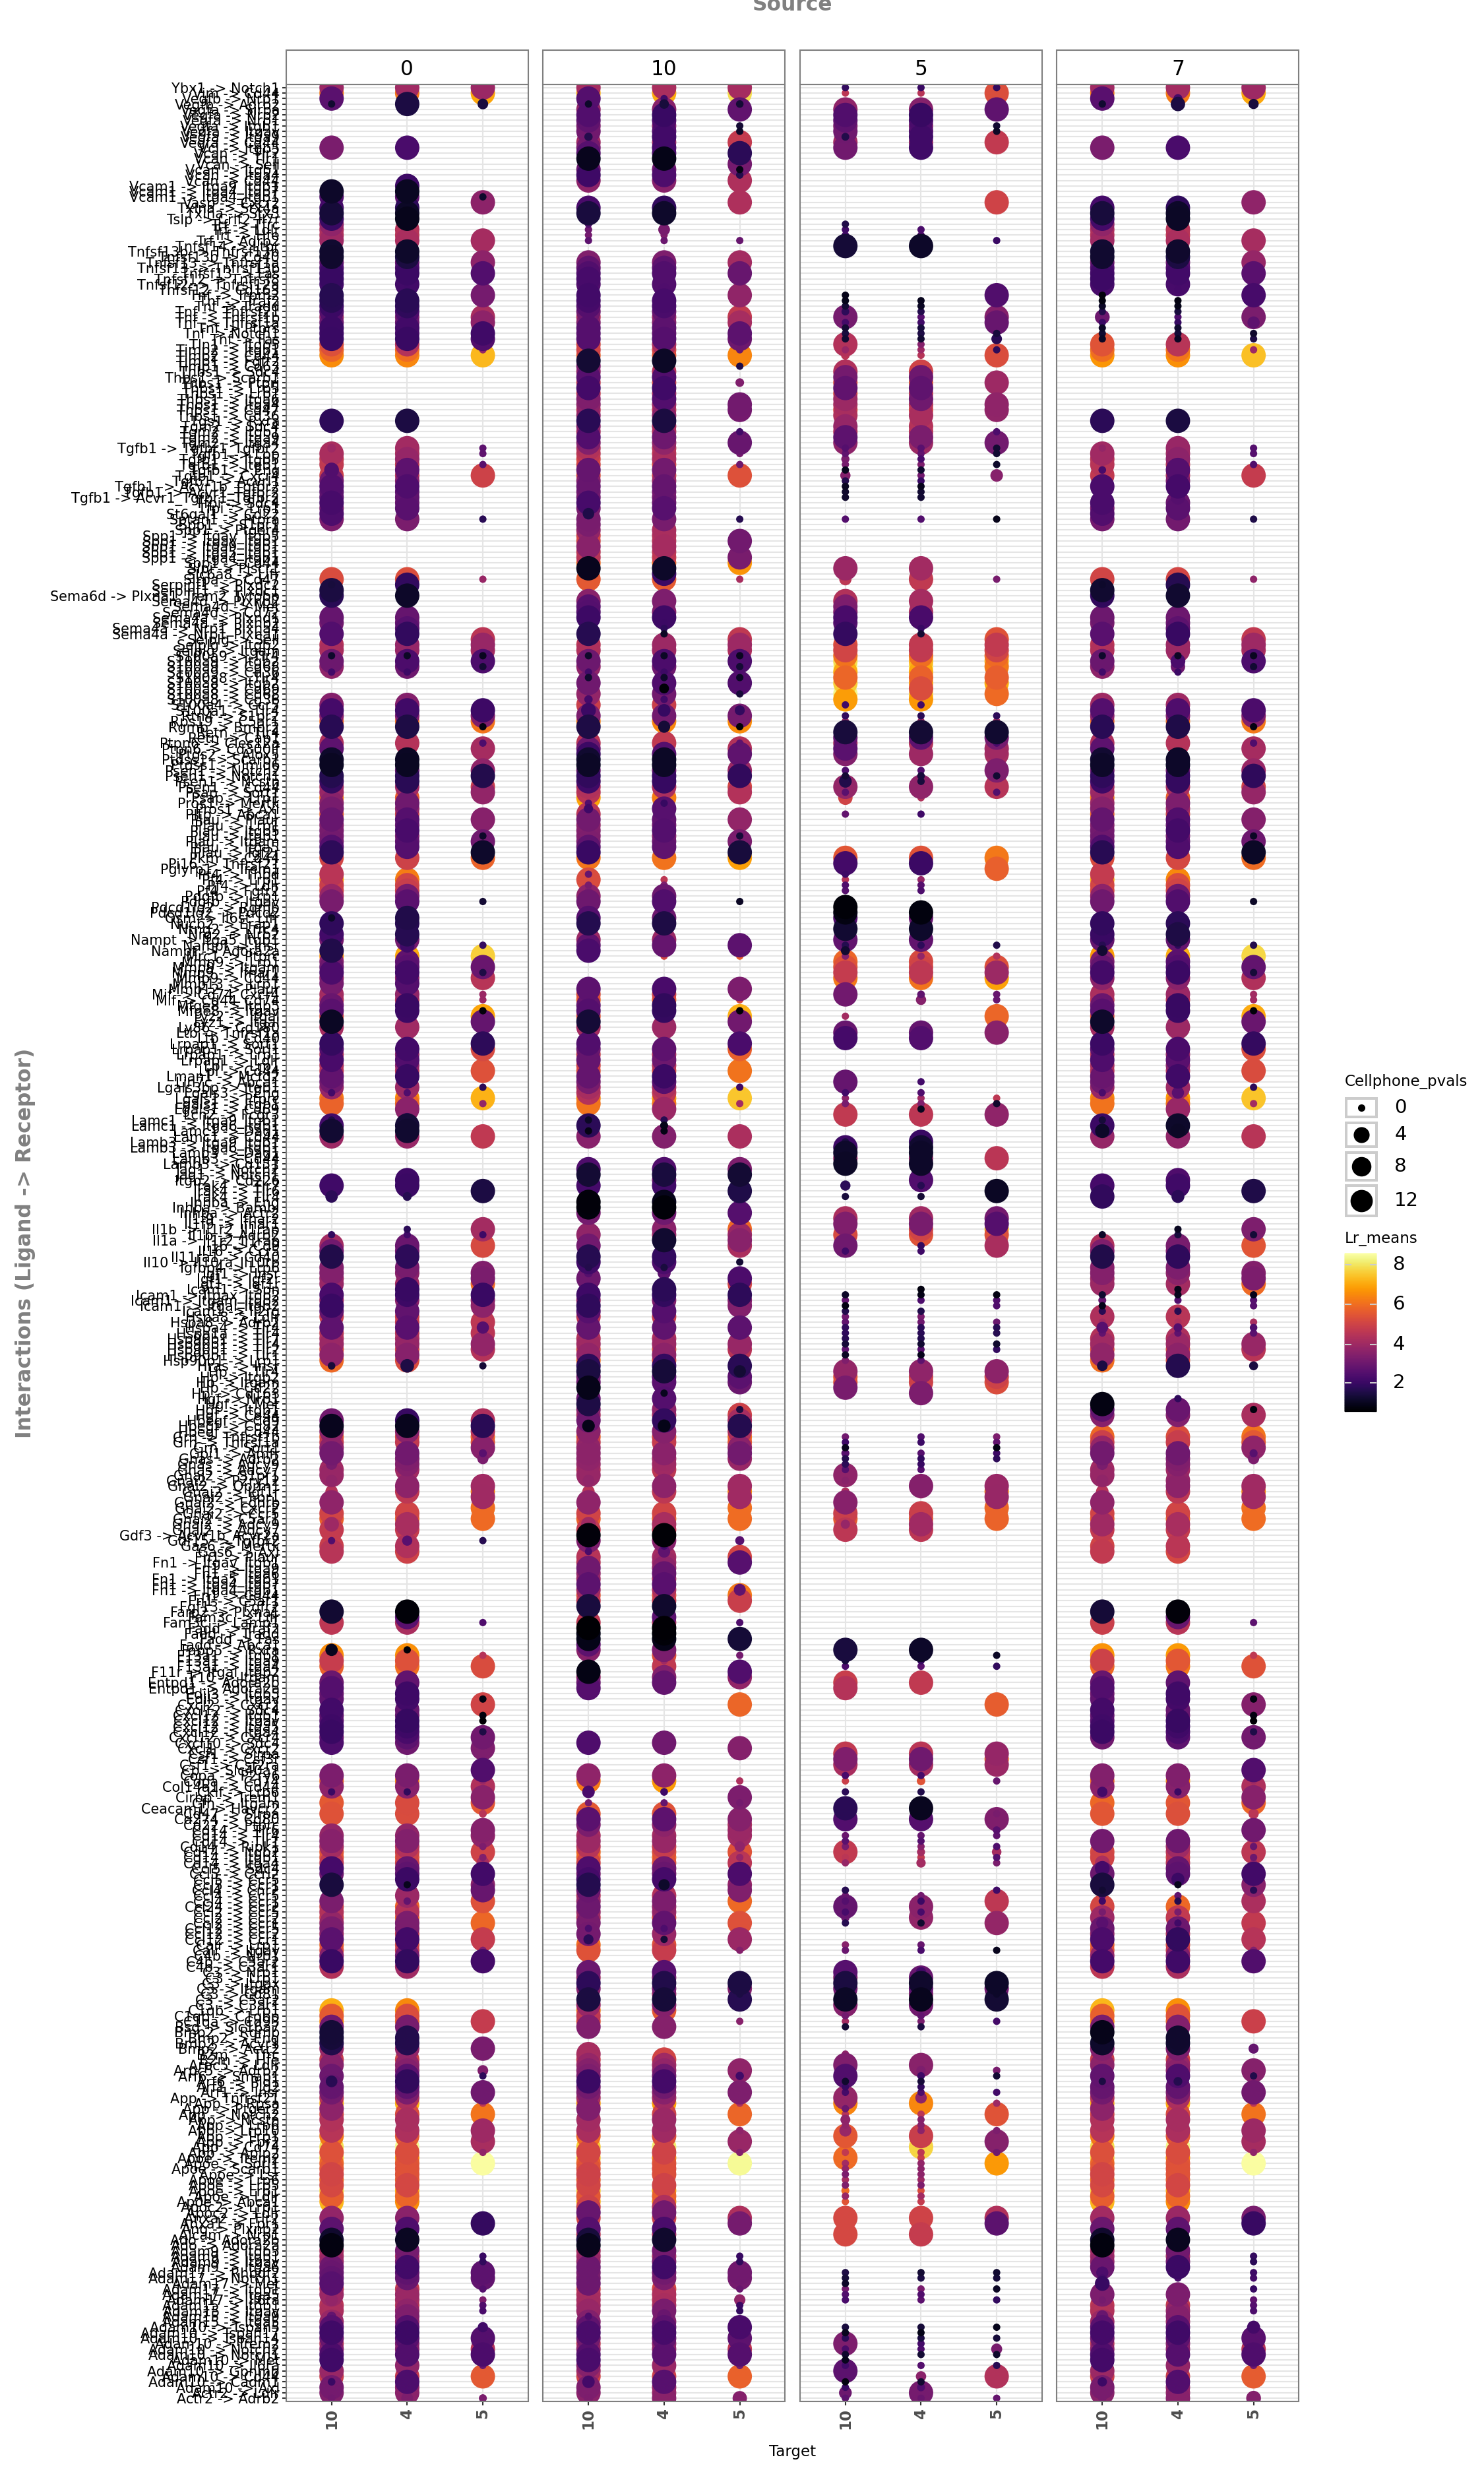

In [17]:
sc.set_figure_params(dpi =50)

li.pl.dotplot(adata = adata,
              colour='lr_means',
              size='cellphone_pvals',
              inverse_size=True, # we inverse sign since we want small p-values to have large sizes
              source_labels=['5', '0', '7', '10'],
              target_labels=['10', '5','4'],
              figure_size=(15, 25),
              filter_fun=lambda x: x['cellphone_pvals'] <= 0.05,   #finally, since cpdbv2 suggests using a filter to FPs, we filter the pvals column to <= 0.05
              uns_key='cpdb_res', # uns_key to use, default is 'liana_res'
              cmap= 'inferno'
             )

#### Visualization - Tileplot

In [18]:
my_plot = li.pl.tileplot(adata = adata,
                         # NOTE: fill & label need to exist for both ligand_ and receptor_ columns
                         fill='means',
                         label='props',
                         label_fun=lambda x: f'{x:.2f}',
                         top_n=10,
                         orderby='cellphone_pvals',
                         orderby_ascending=True,
                         source_labels=['5', '0', '7', '10'],
                         target_labels=['10', '5','4'],
                         uns_key='cpdb_res', # NOTE: default is 'liana_res'
                         source_title='Ligand',
                         target_title='Receptor',
                         figure_size=(8, 7)
                         )
my_plot

/home/acirnu/miniforge3/envs/LIANA/lib/python3.10/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TypeError: facet_grid.__init__() got an unexpected keyword argument 'facets'

## Rank Aggregate - use all methods and integrate results

In addition to the individual methods, LIANA also provides a consensus that integrates the predictions of individual methods. This is done by ranking and aggregating (RRA) the ligand-receptor interaction predictions from all methods.

In [19]:
li.mt.rank_aggregate(adata, groupby='classification', expr_prop=0.1, verbose=True, use_raw= False, resource_name='mouseconsensus')

Using `.X`!
/home/acirnu/miniforge3/envs/LIANA/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
6087 features of mat are empty, they will be removed.
/home/acirnu/miniforge3/envs/LIANA/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:148: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/acirnu/miniforge3/envs/LIANA/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Using resource `mouseconsensus`.
0.08 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 34482 samples and 1451 features
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/home/acirnu/miniforge3/envs/LIANA/lib/python3.10/site-packages/liana/method/sc/_liana_pipe.py:256: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.


Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:23<00:00, 42.53it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


In [20]:
adata.uns['liana_res'].head(20)

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,specificity_rank,magnitude_rank
3008,0,5,Apoe,Sorl1,8.569198,0.0,72.201164,1.568794,3.383570,0.019531,0.934479,0.004117,8.058847e-09
59749,7,5,Apoe,Sorl1,8.560261,0.0,72.067818,1.564085,3.320984,0.019495,0.934423,0.004139,1.813223e-08
49512,5,10,S100a9,Cd68,8.601286,0.0,70.421829,2.022228,6.012231,0.053691,0.933711,0.000083,3.223475e-08
11758,10,5,Apoe,Sorl1,8.454802,0.0,70.494347,1.508489,3.538809,0.019069,0.933743,0.004510,3.223475e-08
2757,0,4,App,Cd74,8.441327,0.0,68.084038,0.500892,0.568575,0.005886,0.932659,0.072922,7.252673e-08
40028,2,5,Apoe,Sorl1,8.408320,0.0,69.800827,1.483985,3.249174,0.018882,0.933436,0.004716,7.252673e-08
59507,7,4,App,Cd74,8.406782,0.0,67.377777,0.484691,0.491229,0.005825,0.932330,0.077343,1.289338e-07
321,0,1,App,Cd74,8.370754,0.0,67.143959,0.469588,0.555827,0.005805,0.932221,0.078893,2.014551e-07
49508,5,10,S100a8,Cd68,8.350307,0.0,67.051491,2.067718,6.005134,0.059384,0.932177,0.000078,2.437583e-07
877,0,11,App,Cd74,8.333372,0.0,66.646011,0.453010,0.434344,0.005762,0.931985,0.082338,2.900896e-07


In [21]:
rank_aggregate.describe()

Rank_Aggregate returns `magnitude_rank`, `specificity_rank`. magnitude_rank and specificity_rank respectively represent an aggregate of the `magnitude`- and `specificity`-related scoring functions from the different methods.


Plot the most ‘relevant’ interactions ordered to the magnitude_rank results from aggregated_rank

/home/acirnu/miniforge3/envs/LIANA/lib/python3.10/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


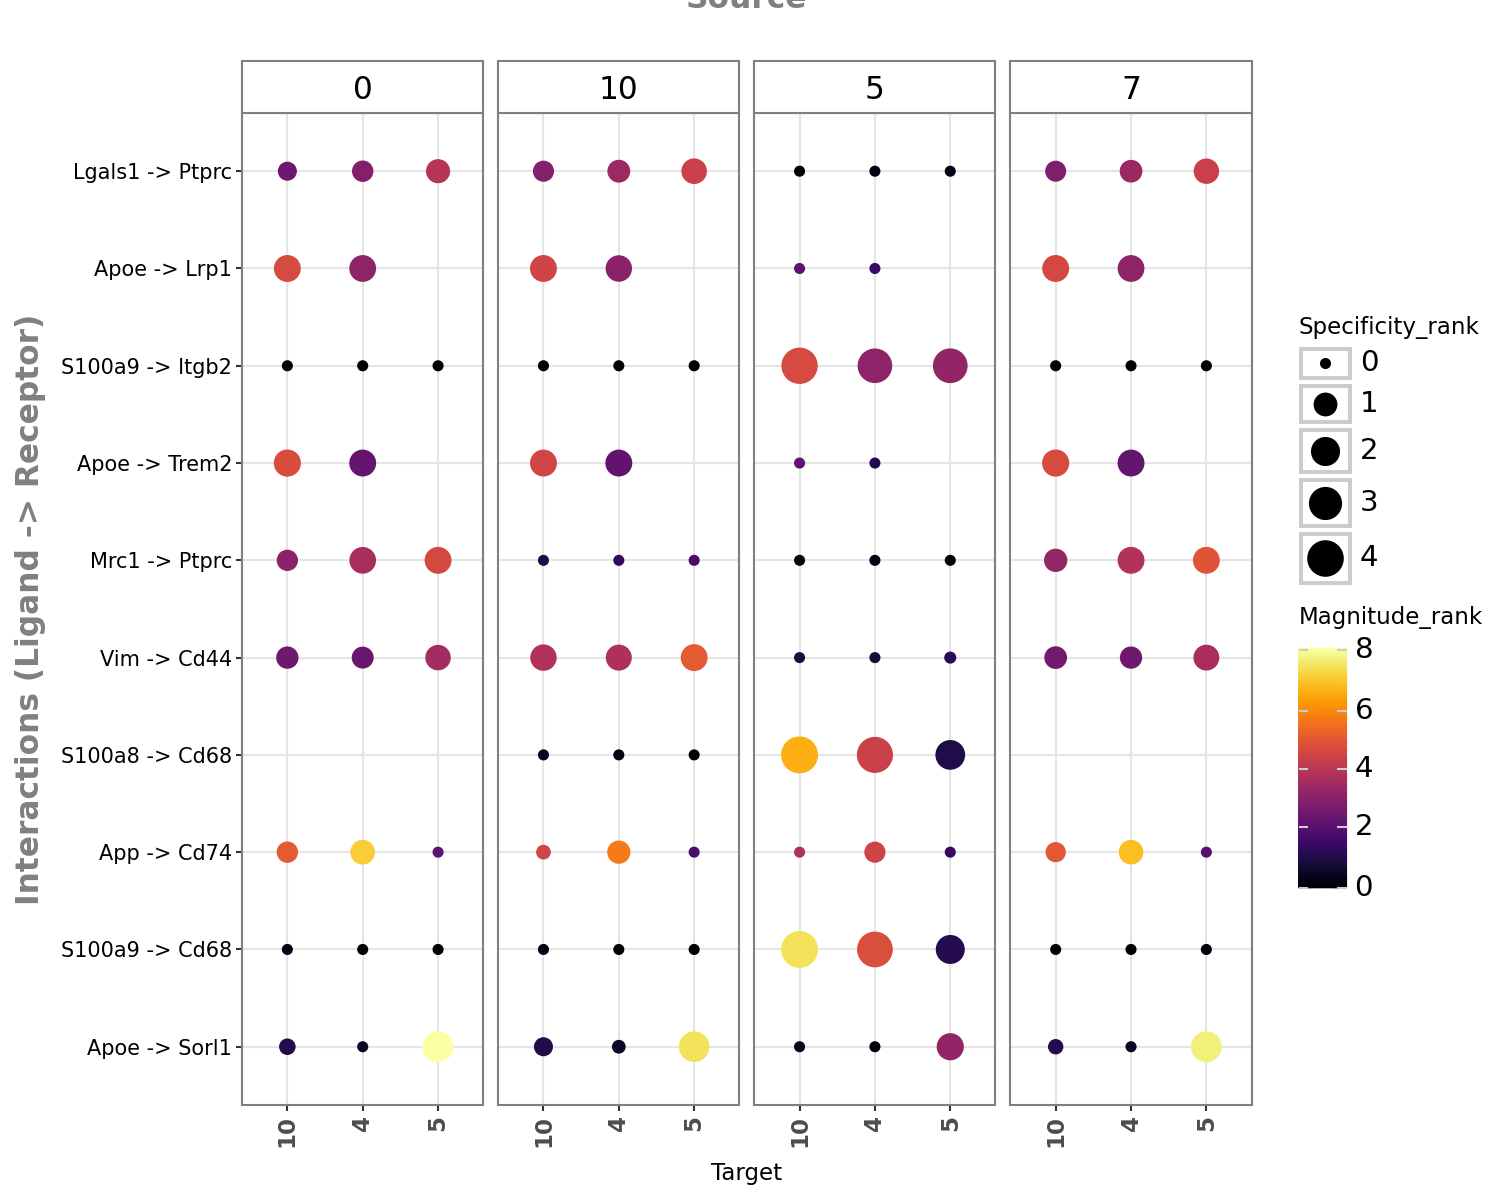

In [23]:
sc.set_figure_params(dpi =100)
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              inverse_colour=True,              
              size='specificity_rank',
              inverse_size=True,
              source_labels=['0', '7', '5', '10'],
              target_labels=['5', '10', '4'],
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(10, 8),
              cmap= "inferno"
             )

Similarly, we can also treat the ranks provided by RRA as a probability distribution to which we can filter interactions according to how robustly and highly ranked they are across the different methods.

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


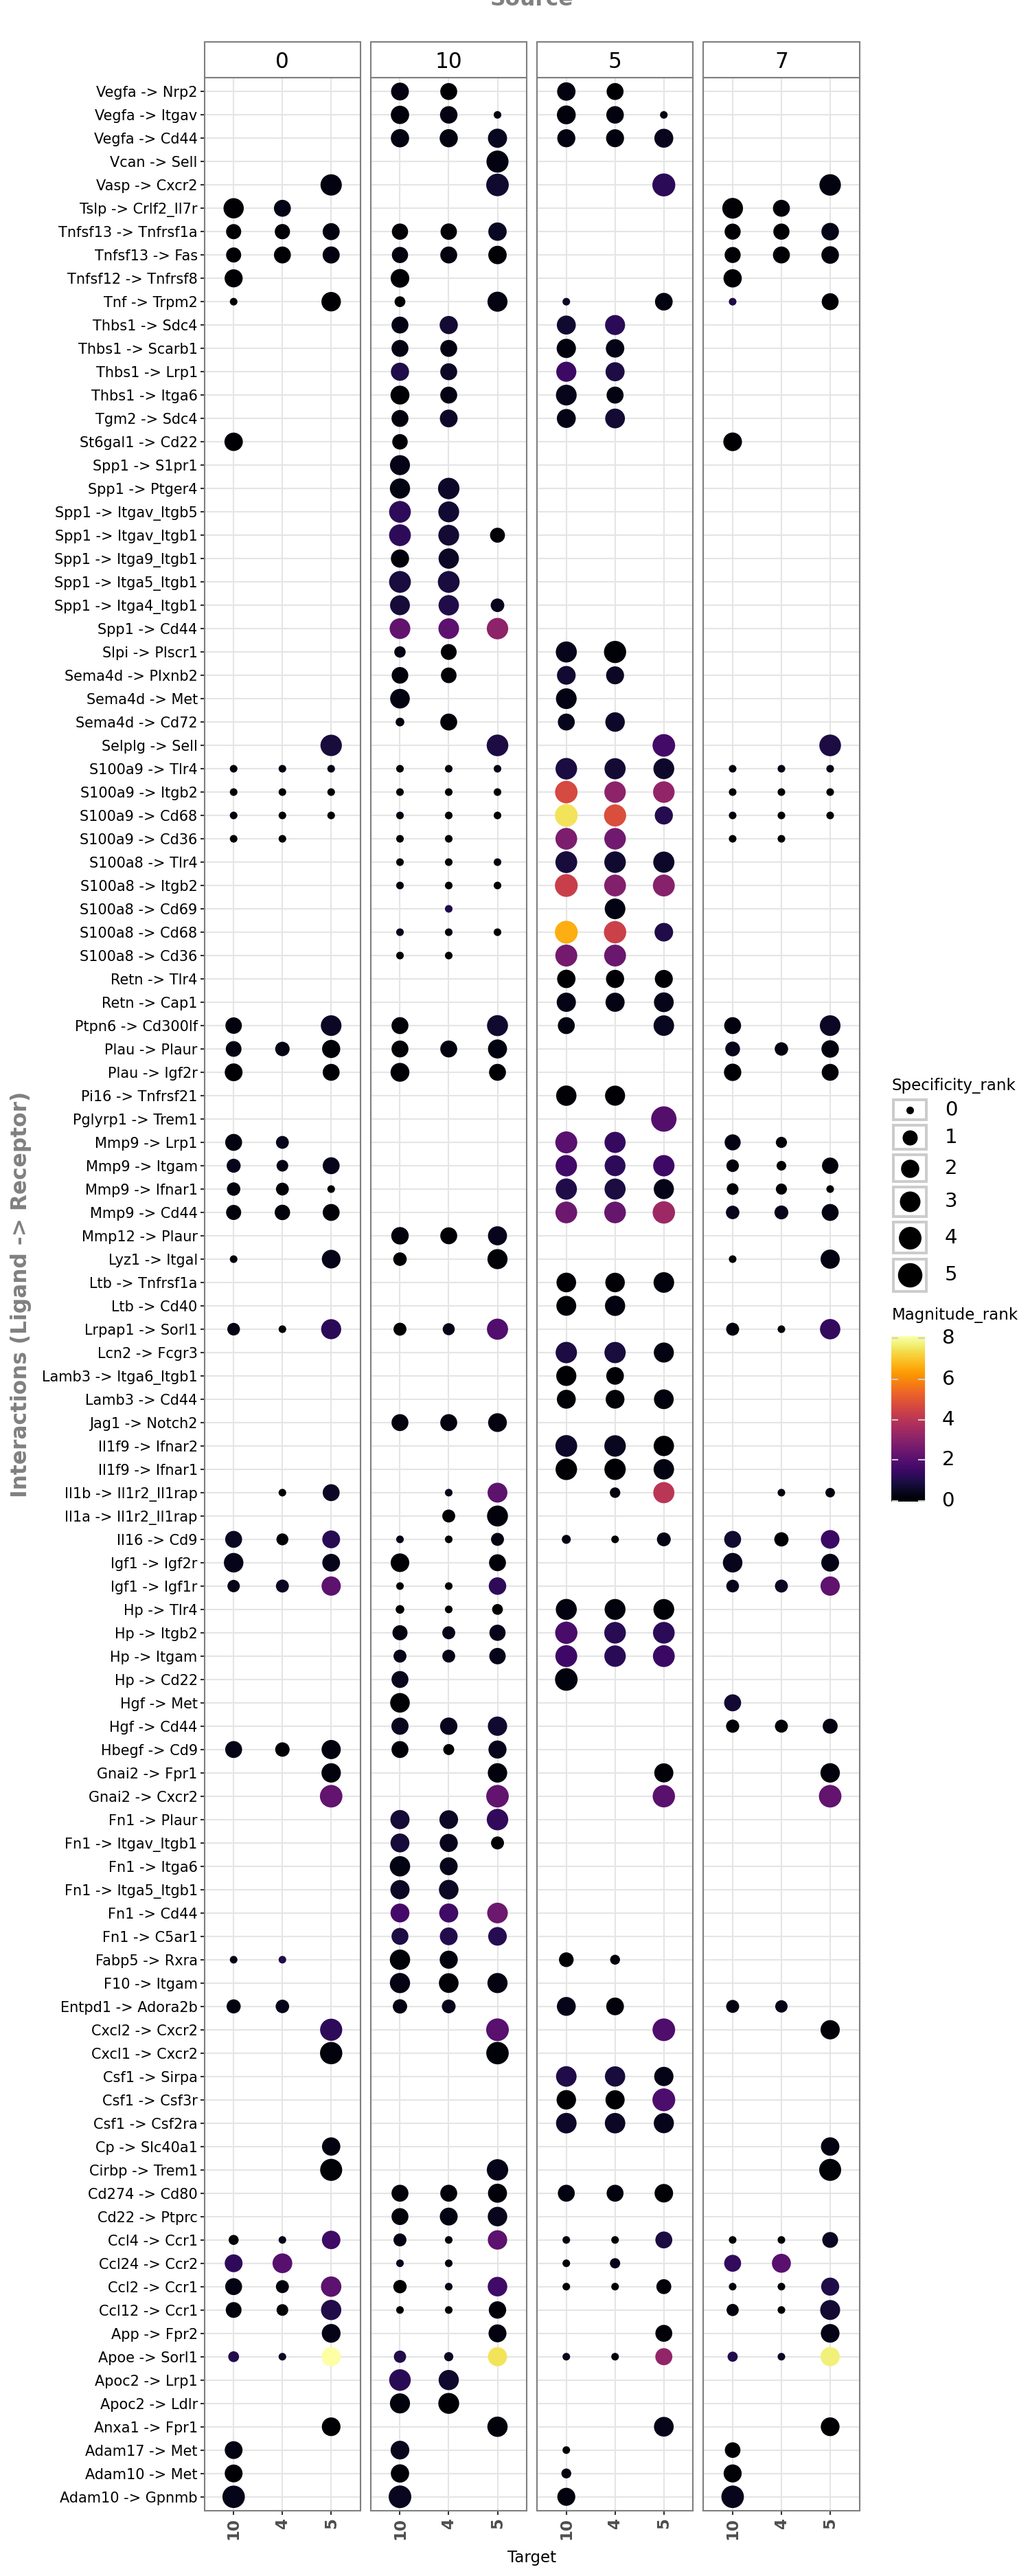

In [25]:
my_plot = li.pl.dotplot(adata = adata,
                        colour='magnitude_rank',
                        inverse_colour=True,
                        size='specificity_rank',
                        inverse_size=True,
                        source_labels=['0', '7', '5', '10'],
                        target_labels=['5', '10', '4'],
                        filter_fun=lambda x: x['specificity_rank'] <= 0.01,
                        figure_size=(10, 25),
                        cmap= "inferno"
                       )
my_plot